In [2]:
# Imports and Setup
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

# has to be set in order to show the image in notebook
%matplotlib inline 

try:
    os.chdir("./Resources")
except:
    pass

In [8]:
y, sr = librosa.load('./single-kick-youtube.wav', duration=30.00)
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

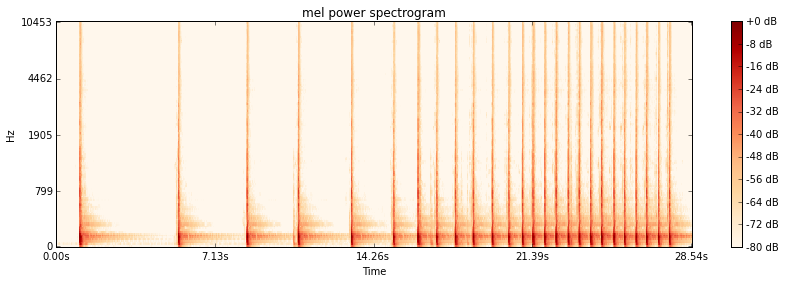

In [9]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

o_env = librosa.onset.onset_strength(y, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [10]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 1231.0, 0.0, 28.902172446405583)

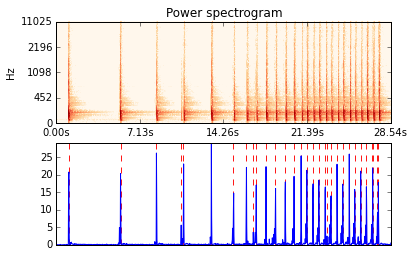

In [11]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [12]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, frame])
    onset_stfts.append(np.abs(D[:, frame]))

[  9.98737276e-01   2.23322654e+00   3.23137879e+00 ...,   6.29841699e-04
   9.65402520e-04   1.01675116e-03]
[ 0.13757524  0.66889101  0.43458873 ...,  0.00280137  0.00226602
  0.00089657]
[ 0.00720645  0.02746208  0.19400151 ...,  0.00294759  0.00108286
  0.00074911]
[  2.40601071e-06   1.09625034e-04   9.60932870e-04 ...,   2.23868383e-07
   5.46897281e-05   2.29114143e-04]
[ 0.00712967  0.28542373  0.26572531 ...,  0.02733845  0.01498423
  0.00390873]
[ 0.19856696  0.72181118  2.16846585 ...,  0.02510348  0.00940648
  0.01992492]
[ 0.0027448   0.02828969  0.04463441 ...,  0.00090258  0.00317768
  0.00210184]
[ 0.04417523  0.13385436  0.60965455 ...,  0.01870572  0.01314119
  0.00118554]
[  1.35683263e-06   1.32368863e-04   1.22943451e-03 ...,   5.40811641e-07
   1.38211612e-06   1.11742438e-05]
[  6.49110225e-05   3.27554755e-02   5.46606742e-02 ...,   7.50911295e-06
   5.21237205e-04   3.90642817e-05]
[ 0.01092166  0.03487452  0.21897739 ...,  0.00269041  0.00168255
  0.00027576]


In [13]:
filename = raw_input()
with open('../Data/' + filename, 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    
    for i in range(len(onset_frames)):
        # onset_stfts is an array of ndarrays so we need to cast to list
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()]) 

kickDrumYoutubeFrames.csv
